《设定测试》读取当日时间格式：n1 2018-02-19
《设定测试》读取当日时间格式：n2 20180219
《设定测试》读取前二日时间格式：n3 2018-02-12
《设定测试》读取当日时间格式：n4 2018219
《设定测试》读取当日时间格式：n5 2018-02-19T12:06:05.326933
《设定测试》手动设定选股开始时间格式：n8 20180201
《设定测试》手动设定选股结束时间格式：n9 20180209
《设定测试》自动设定数据起始设定前推200天：n10 2017-08-03
《设定测试》设定股票代码 000001.XSHE
《数据测试》打印 开盘 最高 最低 收盘 成交量 12.08 12.08 11.38 11.69 282494975.0
《数据测试》当天涨幅 -0.0677830940988835
《数据测试》打印60日均线 13.618999999999991
《数据测试》判断收盘价是否大于60日均线 False
《数据测试》30日最高价 15.13
《数据测试》最近30日，收盘价 Close 大于60日均线的天数 27
《数据测试》10日均线上穿 False
《数据测试》最近10天收阳线的天数 4
《数据测试》最近60天K线实体的最高价 15.15
《数据测试》5日均线上穿10日均线 False


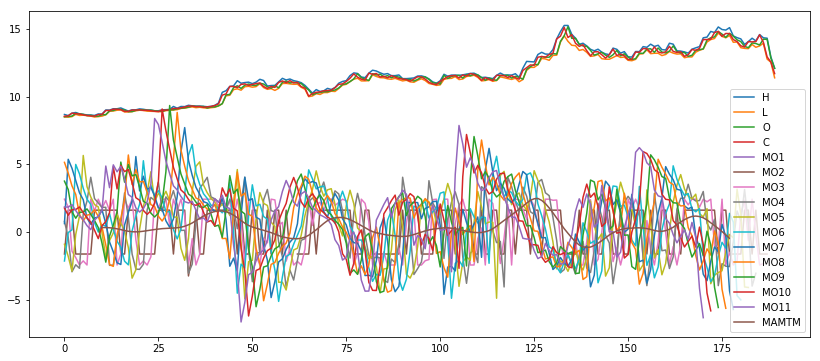

In [5]:

#925选股！

from matplotlib import rcParams
import matplotlib.pyplot as plt
import numpy as np
np.seterr(all='ignore')
rcParams['figure.figsize'] = (14, 6)

from funcat import * #FUNCAT的同花顺/通达信指标模块：和：&，或：|，其他基本相同。可以使用指标选股！！！
from tushare import * #TUSHARE数据连接更新。
from rqalpha import * #RQALPHA本地数据连接，通过 rqalpha update_bundle 8点后更新全部数据库

import time
import datetime #读取/设定数据库时间区域，当前股票，选股时间段。 

n1 = (time.strftime("20%y-%m-%d"))## 20yy-mm-dd格式，输出当日日期
print ("《设定测试》读取当日时间格式：n1",n1) #当日时间格式：yyyy-mm-dd
n2 = (time.strftime("20%y%m%d"))## 20yymmdd格式，输出当日日期
print ("《设定测试》读取当日时间格式：n2",n2) #当日时间格式：yyyymmdd
def getYesterday(): 
    today=datetime.date.today() 
    oneday=datetime.timedelta(days=7) 
    yesterday=today-oneday  
    return yesterday
n3 = (getYesterday())# 输出前二天日期
print ("《设定测试》读取前二日时间格式：n3",n3) #前日时间格式：yyyy-mm-dd
i = datetime.datetime.now()#当前日期

n4 = ("%s%s%s" % (i.year, i.month, i.day) )
print ("《设定测试》读取当日时间格式：n4",n4) #当日时间格式：yyyymmdd

n5 = ("%s" % i.isoformat() )
print ("《设定测试》读取当日时间格式：n5",n5) #当日时间格式：yyyy-mm-dd:...

n8="20180201"#开始时间
print ("《设定测试》手动设定选股开始时间格式：n8",n8)

n9="20180209"#结束时间
print ("《设定测试》手动设定选股结束时间格式：n9",n9)

def getYesterday(): 
    today=datetime.date.today() 
    oneday=datetime.timedelta(days=200) 
    yesterday=today-oneday  
    return yesterday
n10 = (getYesterday())# 输出前200天日期
#n10="20170101"#设定起始时间
print ("《设定测试》自动设定数据起始设定前推200天：n10",n10)

x1="000001.XSHE" #用rqalpha本地数据需要代码后缀！！！！XSHE=深圳，XSHG=上海
print ("《设定测试》设定股票代码",x1)

from funcat.data.tushare_backend import TushareDataBackend
from funcat.data.rqalpha_data_backend import RQAlphaDataBackend
backend = "rqalpha"  #设定数据库连接：rqalpha   tushare
if backend == "rqalpha":
    set_data_backend(RQAlphaDataBackend("~/.rqalpha/bundle"))
elif backend == "tushare":
    set_data_backend(TushareDataBackend())
set_start_date(n10)

S(x1)  # 设置当前关注股票
T(n9)   # 设置当前观察日期

print ("《数据测试》打印 开盘 最高 最低 收盘 成交量",O, H, L, C, V)  # 打印 Open High Low Close
print ("《数据测试》当天涨幅",C / C[1] - 1)  # 当天涨幅
print ("《数据测试》打印60日均线",MA(C, 60))  # 打印60日均线
print ("《数据测试》判断收盘价是否大于60日均线",C > MA(C, 60))  # 判断收盘价是否大于60日均线
print ("《数据测试》30日最高价",HHV(H, 30))  # 30日最高价
print ("《数据测试》最近30日，收盘价 Close 大于60日均线的天数",COUNT(C > MA(C, 60), 30))  # 最近30日，收盘价 Close 大于60日均线的天数
print ("《数据测试》10日均线上穿",CROSS(MA(C, 10), MA(C, 20)))  # 10日均线上穿
print ("《数据测试》最近10天收阳线的天数",COUNT(C > O, 10))  # 最近10天收阳线的天数
print ("《数据测试》最近60天K线实体的最高价",HHV(MAX(O, C), 60))  # 最近60天K线实体的最高价
print ("《数据测试》5日均线上穿10日均线",CROSS(MA(C, 5), MA(C, 10)))  # 5日均线上穿10日均线

#CCI指标 方差函数模块


def AVEDEV(value,N):
    mean = value/N
    for i in range(1,N):
        mean += REF(value,i)/N
    sum_ = ABS(value-mean)
    for i in range(1,N):
        sum_ += ABS(REF(value,i)-mean)
    return sum_/N

TYP = ((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14)
MO1 = ((((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14)-MA(((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14),1))/(0.618*AVEDEV(((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14),1)))
MO2 = ((((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14)-MA(((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14),2))/(0.618*AVEDEV(((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14),2)))
MO3 = ((((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14)-MA(((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14),3))/(0.618*AVEDEV(((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14),3)))
MO4 = ((((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14)-MA(((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14),5))/(0.618*AVEDEV(((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14),5)))
MO5 = ((((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14)-MA(((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14),7))/(0.618*AVEDEV(((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14),7)))
MO6 = ((((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14)-MA(((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14),9))/(0.618*AVEDEV(((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14),9)))
MO7 = ((((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14)-MA(((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14),11))/(0.618*AVEDEV(((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14),11)))
MO8 = ((((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14)-MA(((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14),13))/(0.618*AVEDEV(((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14),13)))
MO9 = ((((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14)-MA(((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14),15))/(0.618*AVEDEV(((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14),15)))
MO10 = ((((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14)-MA(((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14),17))/(0.618*AVEDEV(((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14),17)))
MO11 = ((((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14)-MA(((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14),19))/(0.618*AVEDEV(((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14),19)))
MAMTM = ((MA((MA(CLOSE-REF(CLOSE,12),6)),6)))

#均线
ax = plt.subplot()
ax.plot(H.series, label="H")
ax.plot(L.series, label="L")
ax.plot(O.series, label="O")
ax.plot(C.series, label="C")

ax.plot(MO1.series, label="MO1")
ax.plot(MO2.series, label="MO2")
ax.plot(MO3.series, label="MO3")
ax.plot(MO4.series, label="MO4")
ax.plot(MO5.series, label="MO5")
ax.plot(MO6.series, label="MO6")
ax.plot(MO7.series, label="MO7")
ax.plot(MO8.series, label="MO8")
ax.plot(MO9.series, label="MO9")
ax.plot(MO10.series, label="MO10")
ax.plot(MO11.series, label="MO11")
ax.plot(MAMTM.series, label="MAMTM")

#ax.set_xlim()
plt.legend(loc="best")
plt.show()




In [11]:

#TYP=(if(ISNULL(HIGH),CLOSE,HIGH) + if(ISNULL(LOW),CLOSE,LOW) + CLOSE)/3;
TYP = ((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14)
n2=(TYP-MA(TYP,2))/(2*AVEDEV(TYP,2));
n3=(TYP-MA(TYP,3))/(3*AVEDEV(TYP,3));
n4=(TYP-MA(TYP,5))/(4*AVEDEV(TYP,5));
n5=(TYP-MA(TYP,7))/(5*AVEDEV(TYP,7));
n6=(TYP-MA(TYP,9))/(6*AVEDEV(TYP,9));
n7=(TYP-MA(TYP,11))/(7*AVEDEV(TYP,11));
n8=(TYP-MA(TYP,13))/(8*AVEDEV(TYP,13));
n9=(TYP-MA(TYP,15))/(9*AVEDEV(TYP,15));
n10=(TYP-MA(TYP,17))/(10*AVEDEV(TYP,17));
n11=(TYP-MA(TYP,19))/(11*AVEDEV(TYP,19));

sb2=SUMBARS(n2,0)/BARSSINCE(-n2);
sb3=SUMBARS(n3,0)/BARSSINCE(-n3);
sb4=SUMBARS(n4,0)/BARSSINCE(-n4);
sb5=SUMBARS(n5,0)/BARSSINCE(-n5);
sb6=SUMBARS(n6,0)/BARSSINCE(-n6);
sb7=SUMBARS(n7,0)/BARSSINCE(-n7);
sb8=SUMBARS(n8,0)/BARSSINCE(-n8);
sb9=SUMBARS(n9,0)/BARSSINCE(-n9);
sb10=SUMBARS(n10,0)/BARSSINCE(-n10);
sb11=SUMBARS(n11,0)/BARSSINCE(-n11);

sbMAX=MAX(sb2,sb3,sb4,sb5,sb6,sb7,sb8,sb9,sb10,sb11);
sbMIN=MIN(sb2,sb3,sb4,sb5,sb6,sb7,sb8,sb9,sb10,sb11);

sbCHA=(sbMAX+sbMIN)/sbMAX;
sbCHA1=(sbMAX-sbMIN)/sbMAX;
sbCHA2=(sbMAX+sbMIN)/sbMIN;
sbCHA3=(sbMAX-sbMIN)/sbMIN;
sbMA=MA((sbmax+sbmin),3);
sbMA1=MA((sbmax+sbmin),5);
sbMA2=MA((sbmax+sbmin),7);

NameError: name 'sumbars' is not defined

In [ ]:
//#@Fname=一只权底部指标
//#@comment=只显示底部出现，判断下跌底部位置
//#@control=
//#@FuncType=
//#@style=SBMAX:Line2,技术指标,1,0,1,1,0;SBMIN:Line2,技术指标,1,0,1,1,0;SBMA:Line2,技术指标,2,0,1,0,30061;SBMA1:Line2,技术指标,2,0,1,0,30062;SBMA2:Line2,技术指标,2,0,1,0,30063;
//#@availperiod=2147430400
//#@param=
//#@isDrawCurve=1
//#@Fdesc=一只权底部指标
//#@defaultperiod=16384
//#@coord=DZR
//#@ordinate=0,0.000000;0,0.000000;4,0.000000;2,0.000000;3,0.000000;0;0,0.000000
//#@@FUNCSPEC@=source
TYP:=(IF(ISNULL(HIGH),CLOSE,HIGH) + IF(ISNULL(LOW),CLOSE,LOW) + CLOSE)/3;

n2:=(TYP-MA(TYP,2))/(2*AVEDEV(TYP,2));
n3:=(TYP-MA(TYP,3))/(3*AVEDEV(TYP,3));
n4:=(TYP-MA(TYP,5))/(4*AVEDEV(TYP,5));
n5:=(TYP-MA(TYP,7))/(5*AVEDEV(TYP,7));
n6:=(TYP-MA(TYP,9))/(6*AVEDEV(TYP,9));
n7:=(TYP-MA(TYP,11))/(7*AVEDEV(TYP,11));
n8:=(TYP-MA(TYP,13))/(8*AVEDEV(TYP,13));
n9:=(TYP-MA(TYP,15))/(9*AVEDEV(TYP,15));
n10:=(TYP-MA(TYP,17))/(10*AVEDEV(TYP,17));
n11:=(TYP-MA(TYP,19))/(11*AVEDEV(TYP,19));

sb2:=SUMBARS(n2,0)/BARSSINCE(-n2);
sb3:=SUMBARS(n3,0)/BARSSINCE(-n3);
sb4:=SUMBARS(n4,0)/BARSSINCE(-n4);
sb5:=SUMBARS(n5,0)/BARSSINCE(-n5);
sb6:=SUMBARS(n6,0)/BARSSINCE(-n6);
sb7:=SUMBARS(n7,0)/BARSSINCE(-n7);
sb8:=SUMBARS(n8,0)/BARSSINCE(-n8);
sb9:=SUMBARS(n9,0)/BARSSINCE(-n9);
sb10:=SUMBARS(n10,0)/BARSSINCE(-n10);
sb11:=SUMBARS(n11,0)/BARSSINCE(-n11);

sbMAX:MAX(sb2,sb3,sb4,sb5,sb6,sb7,sb8,sb9,sb10,sb11);
sbMIN:MIN(sb2,sb3,sb4,sb5,sb6,sb7,sb8,sb9,sb10,sb11);

sbCHA:=(sbMAX+sbMIN)/sbMAX;
sbCHA1:=(sbMAX-sbMIN)/sbMAX;
sbCHA2:=(sbMAX+sbMIN)/sbMIN;
sbCHA3:=(sbMAX-sbMIN)/sbMIN;
sbMA:MA((sbmax+sbmin),3);
sbMA1:MA((sbmax+sbmin),5);
sbMA2:MA((sbmax+sbmin),7);

//IF(CROSS(sbma,sbmax) OR CROSS(sbma,sbmin)) BUY;

//BUY
//IF(LONGCROSS(sbmin,sbmax,1));
//IF(REF(sbmin,1)>0 AND sbmax=0,0,1);
	
//sb02:SUMBARS(n2>0,0)/BARSSINCE(n2);
//sb03:SUMBARS(n3>0,0)/BARSSINCE(n3);
//sb04:SUMBARS(n4>0,0)/BARSSINCE(n4);
//sb05:SUMBARS(n5>0,0)/BARSSINCE(n5);
//sb06:SUMBARS(n6>0,0)/BARSSINCE(n6);
//sb07:SUMBARS(n7>0,0)/BARSSINCE(n7);
//sb08:SUMBARS(n8>0,0)/BARSSINCE(n8);
//sb09:SUMBARS(n9>0,0)/BARSSINCE(n9);
//sb010:SUMBARS(n10>0,0)/BARSSINCE(n10);
//sb011:SUMBARS(n11>0,0)/BARSSINCE(n11);

//BARSLAST(X)

//hb2:HHVBARS(n2,0);
//hb3:HHVBARS(n3,0);
//hb4:HHVBARS(n4,0);
//HB5:HHVBARS(n5,0);
//HB6:HHVBARS(n6,0);
//HB7:HHVBARS(n7,0);
//HB8:HHVBARS(n8,0);
//HB9:HHVBARS(n9,0);
//HB10:HHVBARS(n10,0);
//HB11:HHVBARS(n11,0);


//lb2:LLVBARS(n2,0);
//lb3:LLVBARS(n3,0);
//lb4:LLVBARS(n4,0);
//lb5:LLVBARS(n5,0);
//lb6:LLVBARS(n6,0);
//lb7:LLVBARS(n7,0);
//lb8:LLVBARS(n8,0);
//lb9:LLVBARS(n9,0);
//lb10:LLVBARS(n10,0);
//lb11:LLVBARS(n11,0);									

//sbMAX:SUM(sb2,sb3,sb4,sb5,sb6,sb7,sb8,sb9,sb10,sb11);
//sbMIN:SUM(hb2,hb3,hb4,hb5,hb6,hb7,hb8,hb9,hb10,hb11);




